In [2]:
import os  # Provides functions to interact with the operating system
import librosa  # Library for audio processing
import librosa.display  # Module for visualizing audio features
import numpy as np  # Provides support for large, multi-dimensional arrays
import tensorflow as tf  # Deep learning framework
from tensorflow.keras.models import Sequential  # Sequential model for neural networks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization  # Layers for CNN
from tensorflow.keras.utils import to_categorical  # Converts labels to one-hot encoding
from sklearn.model_selection import train_test_split  # Splits dataset into training and testing
from sklearn.preprocessing import LabelEncoder  # Encodes categorical labels into numeric values
from tqdm import tqdm  # Displays progress bars
import glob  # Finds pathnames matching a specified pattern


In [3]:
# Define Constants
SAMPLE_RATE = 22050  # Sample rate for audio (22.05 kHz, common for speech processing)
DURATION = 3  # Duration of each audio file in seconds
N_MELS = 128  # Number of Mel filterbanks used for Mel spectrogram
INPUT_SHAPE = (128, 128, 1)  # Input shape for CNN model (Height, Width, Channels)
DATA_PATH = "E:/capstone/Deep_Fake/dd_total"  # Path where audio dataset is stored

In [4]:
# Function to Load Audio Files and Convert to Mel Spectrogram
def extract_features(file_path, max_pad_len=128):
    try:
        # Load the audio file with a fixed sample rate and duration
        audio, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
        
        # Compute Mel spectrogram
        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=N_MELS)
        
        # Convert the power spectrogram to decibels (log scale)
        mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

        # Ensure the Mel spectrogram has a consistent shape (128, 128)
        pad_width = max_pad_len - mel_spec.shape[1]
        if pad_width > 0:
            # Pad with zeros if it has fewer columns than needed
            mel_spec = np.pad(mel_spec, ((0, 0), (0, pad_width)), mode='constant')
        else:
            # Trim excess columns
            mel_spec = mel_spec[:, :max_pad_len]

        # Expand dimensions to fit CNN input format
        return np.expand_dims(mel_spec, axis=-1)  # Shape: (128, 128, 1)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")  # Handle errors
        return None  # Return None if processing fails

In [5]:
def load_dataset():
    X, y = [], []  # Lists to store features and labels

    # Get all fake audio file paths (wav & mp3)
    fake_files = glob.glob(os.path.join(DATA_PATH, "fake", "*.wav")) + glob.glob(os.path.join(DATA_PATH, "fake", "*.mp3"))
    
    # Get all real audio file paths (wav & mp3)
    real_files = glob.glob(os.path.join(DATA_PATH, "real", "*.wav")) + glob.glob(os.path.join(DATA_PATH, "real", "*.mp3"))

    # Process fake audio files
    for file in tqdm(fake_files, desc="Processing Fake Audio"):
        features = extract_features(file)  # Extract Mel spectrogram
        if features is not None:
            X.append(features)  # Append feature to dataset
            y.append("fake")  # Label as fake

    # Process real audio files
    for file in tqdm(real_files, desc="Processing Real Audio"):
        features = extract_features(file)
        if features is not None:
            X.append(features)
            y.append("real")  # Label as real

    return np.array(X), np.array(y)  # Convert to NumPy arrays for deep learning

In [6]:
# Load Data
X, y = load_dataset()
print(f"Dataset Shape: {X.shape}")  # Print dataset dimensions

# Encode Labels
encoder = LabelEncoder()  # Initialize label encoder
y = encoder.fit_transform(y)  # Convert labels ('fake', 'real') into numeric values (0,1)
y = to_categorical(y)  # Convert labels to one-hot encoding (for classification)

Processing Fake Audio:  22%|██▏       | 5948/26941 [01:48<07:12, 48.58it/s]C:\Users\vuggi\AppData\Local\Temp\ipykernel_7568\2708164503.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
c:\Users\vuggi\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Processing Fake Audio:  22%|██▏       | 5955/26941 [01:48<06:40, 52.40it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file13424.mp3: 


Processing Fake Audio:  29%|██▊       | 7743/26941 [02:24<05:48, 55.03it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file15746.mp3: 


Processing Fake Audio:  31%|███▏      | 8442/26941 [02:38<06:10, 49.91it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file16643.mp3: 


Processing Fake Audio:  33%|███▎      | 9010/26941 [02:51<05:46, 51.77it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file17407.mp3: 


Processing Fake Audio:  34%|███▎      | 9042/26941 [02:51<06:12, 48.06it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file17450.mp3: 


Processing Fake Audio:  40%|████      | 10886/26941 [03:31<05:12, 51.36it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file19851.mp3: 


Processing Fake Audio:  61%|██████▏   | 16532/26941 [05:39<03:49, 45.35it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file27206.mp3: 


Processing Fake Audio:  63%|██████▎   | 16883/26941 [05:48<03:36, 46.39it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file27643.mp3: 


Processing Fake Audio:  63%|██████▎   | 17023/26941 [05:52<03:51, 42.77it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file27839.mp3: 


Processing Fake Audio:  72%|███████▏  | 19464/26941 [06:53<04:16, 29.19it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file30959.mp3: 


Processing Fake Audio:  72%|███████▏  | 19511/26941 [06:55<02:53, 42.77it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file31017.mp3: 


Processing Fake Audio:  78%|███████▊  | 21041/26941 [07:35<02:32, 38.80it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file32972.mp3: 


Processing Fake Audio:  87%|████████▋ | 23341/26941 [08:39<01:27, 41.20it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file5323.mp3: 


Processing Fake Audio: 100%|█████████▉| 26844/26941 [10:48<00:03, 26.26it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file9875.mp3: 


Processing Real Audio: 100%|██████████| 26941/26941 [17:29<00:00, 25.68it/s]


Dataset Shape: (53868, 128, 128, 1)


In [7]:
# Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
# Function to Define CNN Model
def build_model():
    model = Sequential([
        # First convolutional layer
        Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE),  # 32 filters, 3x3 kernel
        BatchNormalization(),  # Normalize batch
        MaxPooling2D((2, 2)),  # Pooling layer to reduce size
        Dropout(0.3),  # Dropout for regularization

        # Second convolutional layer
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        # Third convolutional layer
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Flatten(),  # Flatten feature maps into a single vector
        Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
        Dropout(0.4),  # Additional dropout layer
        Dense(2, activation='softmax')  # Output layer (2 classes: Fake or Real)
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile model
    #Adam - Optimizer to adjust the learning rates of parameters during training 
    return model

In [9]:
# Build and Train Model
model = build_model()
model.summary()  # Print model architecture

c:\Users\vuggi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,218 (12.61 MB)

 Trainable params: 3,304,770 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
# Train the Model
epochs = 5  # Number of training epochs
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Evaluate Model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")  # Print accuracy

Epoch 1/5
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 740s 618ms/step - accuracy: 0.9068 - loss: 0.4570 - val_accuracy: 0.8129 - val_loss: 1.6739
Epoch 2/5
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 738s 626ms/step - accuracy: 0.9906 - loss: 0.0284 - val_accuracy: 0.9249 - val_loss: 0.5048
Epoch 3/5
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 705s 598ms/step - accuracy: 0.9924 - loss: 0.0250 - val_accuracy: 0.9990 - val_loss: 0.0025
Epoch 4/5
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 710s 602ms/step - accuracy: 0.9956 - loss: 0.0142 - val_accuracy: 0.9479 - val_loss: 0.2756
Epoch 5/5
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 699s 593ms/step - accuracy: 0.9956 - loss: 0.0209 - val_accuracy: 0.9908 - val_loss: 0.0394
506/506 ━━━━━━━━━━━━━━━━━━━━ 54s 107ms/step - accuracy: 0.9907 - loss: 0.0347
Test Accuracy: 99.08%


In [11]:
# Make Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels
y_true_classes = np.argmax(y_test, axis=1) # Convert true one hot labels into class labels


506/506 ━━━━━━━━━━━━━━━━━━━━ 52s 102ms/step


In [12]:
# Classification Report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=['Fake', 'Real']))

Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      0.98      0.99      8078
        Real       0.98      1.00      0.99      8083

    accuracy                           0.99     16161
   macro avg       0.99      0.99      0.99     16161
weighted avg       0.99      0.99      0.99     16161



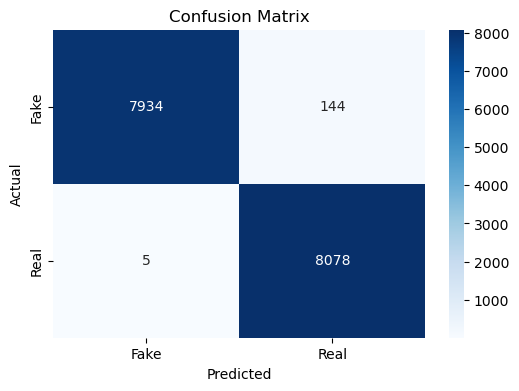

In [13]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Visualizing Mel-Spectrogram of a Sample Audio File
def visualize_mel_spectrogram(file_path):
    audio, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=N_MELS)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.show()

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Convert one-hot encoded y_test and predictions back to class labels
y_true_classes = y_test.argmax(axis=1)
y_pred_classes = y_pred.argmax(axis=1)

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Error Rate
error_rate = 1 - accuracy
print(f"Error Rate: {error_rate:.4f}")

# Precision
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9908
Error Rate: 0.0092
Precision: 0.9909
Recall: 0.9908
F1 Score: 0.9908


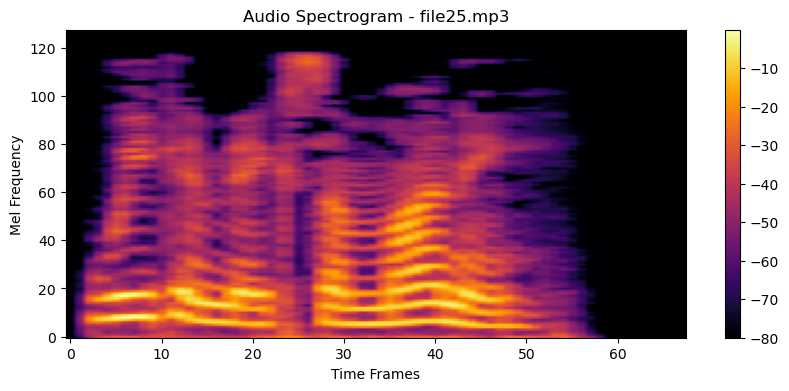

In [16]:
# Load and preprocess the audio file
file_path = "E:/capstone/Deep_Fake/dd_3000/fake/file25.mp3"
audio, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=N_MELS)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Visualizing the Mel Spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(mel_spec_db, aspect='auto', origin='lower', cmap='inferno')
plt.colorbar()
plt.title(f'Audio Spectrogram - file25.mp3')
plt.xlabel("Time Frames")
plt.ylabel("Mel Frequency")
plt.show()


In [17]:
# Save Model
model.save("deepfake_audio_cnn.h5")